In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CO2 Emissions_Canada.csv')
df

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

checking null data

In [4]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

split the data to numerical data and categorical data

Data analysis

In [5]:
from ydata_profiling import ProfileReport


profile = ProfileReport(df, title="Profiling Report")

In [390]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Engine Size vs. CO2 Emissions

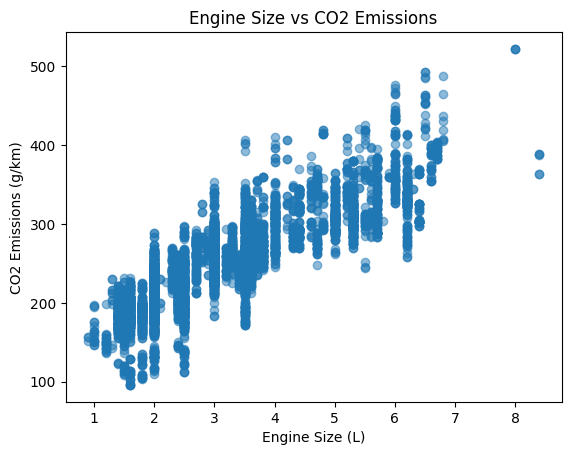

In [6]:
%matplotlib inline
plt.scatter(df['Engine Size(L)'], df['CO2 Emissions(g/km)'], alpha=0.5)
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Engine Size vs CO2 Emissions')
plt.show()


ploting vehicle class vs CO2 Emission

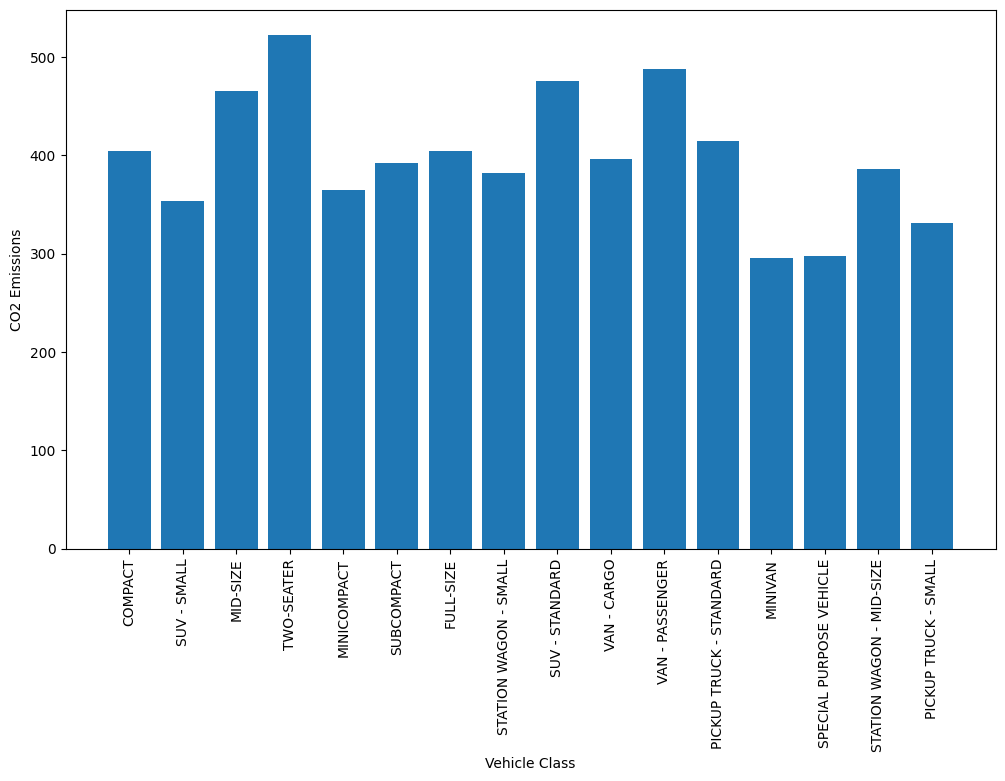

In [7]:
%matplotlib inline
vehicle_classes = df['Vehicle Class'].unique()
vehicle_classes_count =range(len(vehicle_classes))

plt.figure(figsize=(12,7))

plt.xlabel('Vehicle Class')
plt.ylabel('CO2 Emissions')

plt.bar(df['Vehicle Class'] , df['CO2 Emissions(g/km)'] )
plt.xticks(vehicle_classes_count ,vehicle_classes, rotation = 'vertical')
plt.show()


Make vs CO2 Emission

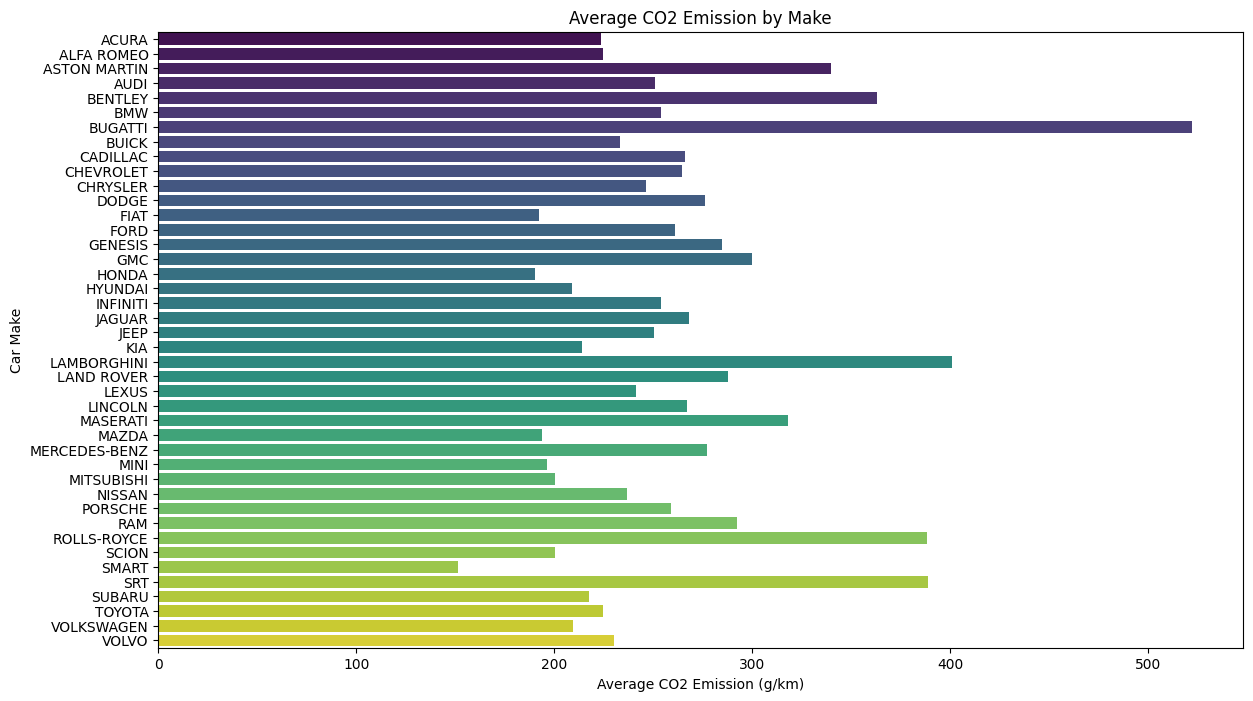

In [8]:
average_co2_by_make = df.groupby('Make')['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='CO2 Emissions(g/km)', y='Make', data=average_co2_by_make, palette='viridis')
plt.title('Average CO2 Emission by Make')
plt.xlabel('Average CO2 Emission (g/km)')
plt.ylabel('Car Make')
plt.show()

Data preprocessing

In [9]:
columns_to_drop = ['Model','Make','Fuel Consumption City (L/100 km)','Fuel Consumption Comb (mpg)','Fuel Consumption Hwy (L/100 km)']

In [10]:
df.drop(labels=columns_to_drop,axis=1,inplace=True)

In [11]:
df

Vehicle Class  Engine Size(L)  Cylinders Transmission Fuel Type  \
0            COMPACT             2.0          4          AS5         Z   
1            COMPACT             2.4          4           M6         Z   
2            COMPACT             1.5          4          AV7         Z   
3        SUV - SMALL             3.5          6          AS6         Z   
4        SUV - SMALL             3.5          6          AS6         Z   
...              ...             ...        ...          ...       ...   
7380     SUV - SMALL             2.0          4          AS8         Z   
7381     SUV - SMALL             2.0          4          AS8         Z   
7382     SUV - SMALL             2.0          4          AS8         Z   
7383  SUV - STANDARD             2.0          4          AS8         Z   
7384  SUV - STANDARD             2.0          4          AS8         Z   

      Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  
0                                  8.5                  196  
1                                  9.6                  221  
2                                  5.9                  136  
3                                 11.1                  255  
4                                 10.6                  244  
...                                ...                  ...  
7380                               9.4                  219  
7381                               9.9                  232  
7382                              10.3                  240  
7383                               9.9                  232  
7384                              10.7                  248  

[7385 rows x 7 columns]

using quantile function to remove outliers

In [12]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create new DataFrames for numerical and categorical data
numerical_data = df[numerical_columns]

In [13]:
min_list = []
max_list = []
for  i in enumerate(numerical_data):
    mn , mx = numerical_data[i[1]].quantile([0.01,0.99])
    min_list.append(mn)
    max_list.append(mx)

In [14]:
for  i in enumerate(numerical_data):
    print(i[0])
    df =df[ df[i[1]] > min_list[i[0]] ]
    df =df[ df[i[1]] < max_list[i[0]] ]

0
1
2
3


In [15]:
print("the length after removing the outliers : " , len(df))

the length after removing the outliers :  6720


dealing with the catigorical

In [16]:
vehicles=list(df['Vehicle Class'].unique())

In [17]:
vehicles

['COMPACT',
 'SUV - SMALL',
 'MID-SIZE',
 'TWO-SEATER',
 'SUBCOMPACT',
 'FULL-SIZE',
 'STATION WAGON - SMALL',
 'SUV - STANDARD',
 'VAN - CARGO',
 'VAN - PASSENGER',
 'PICKUP TRUCK - STANDARD',
 'MINIVAN',
 'SPECIAL PURPOSE VEHICLE',
 'MINICOMPACT',
 'STATION WAGON - MID-SIZE',
 'PICKUP TRUCK - SMALL']

In [18]:
transmission=list(df['Transmission'].unique())

In [19]:
transmission

['AS5',
 'M6',
 'AV7',
 'AS6',
 'AM6',
 'AM7',
 'AV8',
 'AS8',
 'A7',
 'A6',
 'A8',
 'M7',
 'A4',
 'M5',
 'A5',
 'AV',
 'AS7',
 'A9',
 'AS9',
 'AV6',
 'AS4',
 'AM8',
 'AM9',
 'AS10',
 'A10',
 'AV10']

In [20]:
fuelType=list(df['Fuel Type'].unique())

In [21]:
fuelType

['Z', 'D', 'X', 'E', 'N']

In [22]:
# Create a label encoder
from sklearn.calibration import LabelEncoder


encoder = LabelEncoder()

# Encode the car class list
encoded_labels = encoder.fit_transform(vehicles)

# Create a dictionary mapping car class to its label
car_class_map = dict(zip(vehicles, encoded_labels))

In [23]:
car_class_map

{'COMPACT': 0,
 'SUV - SMALL': 11,
 'MID-SIZE': 2,
 'TWO-SEATER': 13,
 'SUBCOMPACT': 10,
 'FULL-SIZE': 1,
 'STATION WAGON - SMALL': 9,
 'SUV - STANDARD': 12,
 'VAN - CARGO': 14,
 'VAN - PASSENGER': 15,
 'PICKUP TRUCK - STANDARD': 6,
 'MINIVAN': 4,
 'SPECIAL PURPOSE VEHICLE': 7,
 'MINICOMPACT': 3,
 'STATION WAGON - MID-SIZE': 8,
 'PICKUP TRUCK - SMALL': 5}

In [24]:
encoded_labels = encoder.fit_transform(transmission)

transmission_class_map = dict(zip(transmission, encoded_labels))

In [25]:
transmission_class_map

{'AS5': 13,
 'M6': 24,
 'AV7': 21,
 'AS6': 14,
 'AM6': 7,
 'AM7': 8,
 'AV8': 22,
 'AS8': 16,
 'A7': 4,
 'A6': 3,
 'A8': 5,
 'M7': 25,
 'A4': 1,
 'M5': 23,
 'A5': 2,
 'AV': 18,
 'AS7': 15,
 'A9': 6,
 'AS9': 17,
 'AV6': 20,
 'AS4': 12,
 'AM8': 9,
 'AM9': 10,
 'AS10': 11,
 'A10': 0,
 'AV10': 19}

In [26]:
encoded_labels = encoder.fit_transform(fuelType)

fuelType_class_map = dict(zip(fuelType, encoded_labels))

In [27]:
fuelType_class_map

{'Z': 4, 'D': 0, 'X': 3, 'E': 1, 'N': 2}

In [28]:
# List of categorical columns to one-hot encode
categorical_columns = ['Vehicle Class', 'Transmission', 'Fuel Type']

# # Use get_dummies on all categorical columns at once
# df = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns, drop_first=False)


In [29]:
# Label encoders for each categorical column
from sklearn.calibration import LabelEncoder


encoders = {col: LabelEncoder() for col in categorical_columns}

# Encode categorical data
for col in categorical_columns:
  df[col] = encoders[col].fit_transform(df[col])

In [30]:
df

Vehicle Class  Engine Size(L)  Cylinders  Transmission  Fuel Type  \
0                 0             2.0          4            13          4   
1                 0             2.4          4            24          4   
2                 0             1.5          4            21          4   
3                11             3.5          6            14          4   
4                11             3.5          6            14          4   
...             ...             ...        ...           ...        ...   
7380             11             2.0          4            16          4   
7381             11             2.0          4            16          4   
7382             11             2.0          4            16          4   
7383             12             2.0          4            16          4   
7384             12             2.0          4            16          4   

      Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  
0                                  8.5                  196  
1                                  9.6                  221  
2                                  5.9                  136  
3                                 11.1                  255  
4                                 10.6                  244  
...                                ...                  ...  
7380                               9.4                  219  
7381                               9.9                  232  
7382                              10.3                  240  
7383                               9.9                  232  
7384                              10.7                  248  

[6720 rows x 7 columns]

normalizing

In [31]:
df.iloc[7]

Vehicle Class                         2.0
Engine Size(L)                        3.7
Cylinders                             6.0
Transmission                         14.0
Fuel Type                             4.0
Fuel Consumption Comb (L/100 km)     11.1
CO2 Emissions(g/km)                 255.0
Name: 7, dtype: float64

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Vehicle Class','Engine Size(L)', 'Cylinders','Transmission','Fuel Type', 'Fuel Consumption Comb (L/100 km)']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


spliting the data to train and test

In [33]:
df

Vehicle Class  Engine Size(L)  Cylinders  Transmission  Fuel Type  \
0         -1.337708       -0.940211  -0.996473     -0.036074   0.821669   
1         -1.337708       -0.613131  -0.996473      1.563577   0.821669   
2         -1.337708       -1.349062  -0.996473      1.127308   0.821669   
3          0.967427        0.286342   0.297998      0.109348   0.821669   
4          0.967427        0.286342   0.297998      0.109348   0.821669   
...             ...             ...        ...           ...        ...   
7380       0.967427       -0.940211  -0.996473      0.400194   0.821669   
7381       0.967427       -0.940211  -0.996473      0.400194   0.821669   
7382       0.967427       -0.940211  -0.996473      0.400194   0.821669   
7383       1.176985       -0.940211  -0.996473      0.400194   0.821669   
7384       1.176985       -0.940211  -0.996473      0.400194   0.821669   

      Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  
0                            -0.985413                  196  
1                            -0.539197                  221  
2                            -2.040108                  136  
3                             0.069281                  255  
4                            -0.133545                  244  
...                                ...                  ...  
7380                         -0.620327                  219  
7381                         -0.417501                  232  
7382                         -0.255241                  240  
7383                         -0.417501                  232  
7384                         -0.092980                  248  

[6720 rows x 7 columns]

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop(['CO2 Emissions(g/km)'], axis= 1)
y = df["CO2 Emissions(g/km)"]



In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)

#SVM

In [36]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=32)

In [37]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
svr_model = SVR(kernel='rbf',C=100.0)
svr_model.fit(x_train, y_train)

# Predict CO2 emissions for the test data
predictions = svr_model.predict(x_test)

In [38]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
print(f"Mean Absolute Error:{mean_absolute_error(y_test, predictions)}")
print(f"R-Squared Score:{r2_score(y_test, predictions)*100}%")

Mean Squared Error: 7.630240459920013
Mean Absolute Error:1.9798629819357776
R-Squared Score:99.69981252103781%


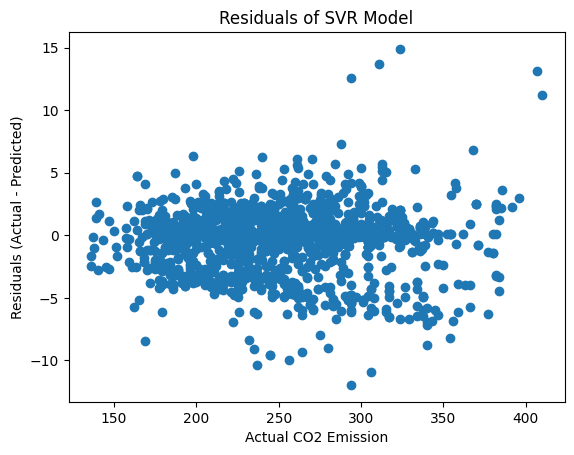

In [40]:
residuals = y_test - predictions
plt.scatter(y_test, residuals)
plt.xlabel("Actual CO2 Emission")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals of SVR Model")
plt.show()


In [424]:
svr_model.score(x_train,y_train)

0.997031925787045

In [425]:
svr_model.score(x_test,y_test)

0.9969981252103781

In [426]:
svr_model.score(x_val,y_val)

0.9964376902589244

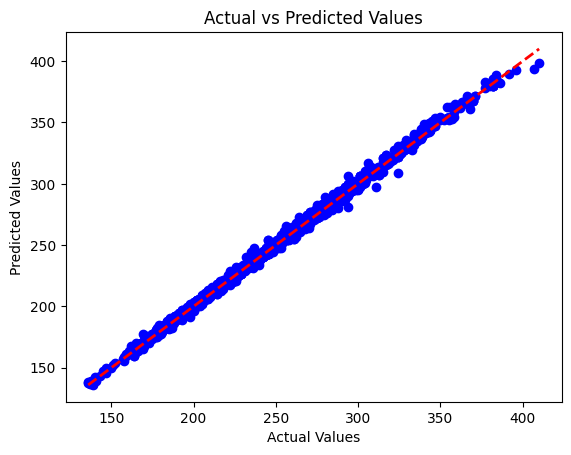

In [427]:
plt.scatter(y_test, predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [428]:
import joblib

# Assuming you have already trained and named your SVR model as 'svr_model'
# You can save your model using joblib
joblib.dump(svr_model, 'svr_model.pkl')



['svr_model.pkl']

In [429]:
svr_load = joblib.load('svr_model.pkl')

In [430]:
VehicleClass = 'COMPACT'			
EngineSize = 2.4
Cylinders	= 4
Transmission ='M6'
FuelType = 'Z'
FuelConsumptionComb =9.6

In [431]:
data = [[car_class_map[VehicleClass],EngineSize,Cylinders,transmission_class_map[Transmission],fuelType_class_map[FuelType],FuelConsumptionComb]]	
test_frame = pd.DataFrame(data,columns=['Vehicle Class','Engine Size(L)', 'Cylinders',  'Transmission', 'Fuel Type','Fuel Consumption Comb (L/100 km)'])

In [432]:
test_frame

Vehicle Class  Engine Size(L)  Cylinders  Transmission  Fuel Type  \
0              0             2.4          4            24          4   

   Fuel Consumption Comb (L/100 km)  
0                               9.6

In [434]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
numerical_cols = ['Vehicle Class','Engine Size(L)', 'Cylinders','Transmission','Fuel Type', 'Fuel Consumption Comb (L/100 km)']
test_frame[numerical_cols] = scaler.transform(test_frame[numerical_cols])

In [435]:
test_frame

Vehicle Class  Engine Size(L)  Cylinders  Transmission  Fuel Type  \
0      -1.337708       -0.613131  -0.996473      1.563577   0.821669   

   Fuel Consumption Comb (L/100 km)  
0                         -0.539197

In [436]:
prediction = svr_load.predict(test_frame)

In [437]:
prediction[0]

222.29577483463794

In [438]:
import joblib

# Assuming you have a fitted StandardScaler named scaler
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']